# 1. Install Packages

In [13]:
pip install resampy

     ---------------------------------------- 3.1/3.1 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip list

Package                      VersionNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



---------------------------- --------------
absl-py                      2.1.0
anyio                        4.4.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
audioread                    3.0.1
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
certifi                      2024.7.4
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
defusedxml                   0.7.1
executing                    2.0.1
fastjsonschema               2.20.0
flatbuffers                  24.3.25
fonttools                    4.5

# 2. Define Imports

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import os

# 3. Data Preprocessing

## 3.1 Defina path

In [2]:
audio_human = "AudioData/human/turkish6.mp3"
audio_synthetic = "AudioData/synthetic/turkish6_cloned.mp3"

In [3]:
# ipd.Audio(audio_human)
ipd.Audio(audio_synthetic)

In [9]:
audio_human

'TrainingData/human/turkish6.mp3'

## 3.2 Convert to Mono audio

In [10]:
# Convert stereo to mono (two or more channels to sigle channel)
def pre_process(audio_file):
    # conert to single hz
    target_sr = 22050 
    # Load the data with resampling
    signal, sr = librosa.load(audio_file, sr=target_sr, mono=False, res_type='kaiser_fast')
    if signal.ndim > 1:  # Check if the signal is stereo
        print(True)
        # Convert stereo to mono by averaging the channels
        signal = np.mean(signal, axis=0)
    return signal, target_sr

In [11]:
human_signal, human_sr = pre_process(audio_human)
synthetic_signal, synthetic_sr = pre_process(audio_synthetic)

In [12]:
print(human_signal)
print(human_sr)

print(synthetic_signal)
print(synthetic_sr)

[-0.00031312 -0.00064573 -0.00067221 ... -0.00091826 -0.00137467
  0.        ]
22050
[-0.00260611 -0.00492192 -0.00405288 ... -0.00036639 -0.00018583
  0.        ]
22050


## 3.3 Visualize waveform

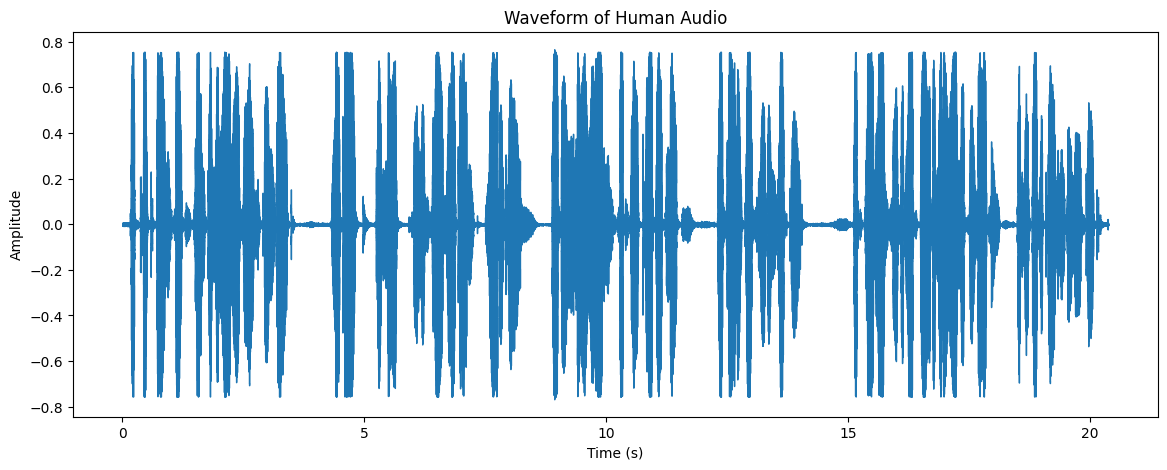

In [16]:
plt.figure(figsize=(14, 5))
# librosa.display.waveshow(human_signal, sr=human_sr)
librosa.display.waveshow(synthetic_signal, sr=synthetic_sr)
plt.title('Waveform of Human Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## 4. Create function to extract MFCC

In [17]:
def extract_MFCC(signal, sr):
    signal.shape # The output is 1 dimensional array with the following value
    sr # Sample rate
    print("Signal: ", signal)
    print("Sample Rate: ", sr)

    # Extract MFCC
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    print(mfccs.shape) # First value is the number of rows, second value is the number of columns or frames
    print(mfccs)
    
    return mfccs

In [18]:
print("Human")
human = extract_MFCC(human_signal, human_sr)
print("\n\n Synthetic")
synthetic = extract_MFCC(synthetic_signal, synthetic_sr)

Human
Signal:  [-0.00031312 -0.00064573 -0.00067221 ... -0.00091826 -0.00137467
  0.        ]
Sample Rate:  22050
(13, 959)
[[-5.09982849e+02 -4.89560699e+02 -4.89371399e+02 ... -4.93400055e+02
  -4.95394226e+02 -5.07797516e+02]
 [ 5.05865097e+01  6.65243149e+01  6.67279358e+01 ...  5.98336143e+01
   6.18905869e+01  5.59932251e+01]
 [ 2.46911926e+01  2.53473320e+01  2.48213863e+01 ...  3.27366371e+01
   3.31070900e+01  3.40062027e+01]
 ...
 [-6.24108410e+00  1.24639660e-01  2.30836248e+00 ... -5.28030872e+00
  -5.93150234e+00 -1.54473448e+00]
 [-3.23805285e+00 -2.10539579e+00 -2.78047657e+00 ...  1.15824044e-01
  -9.37013030e-01 -4.20286059e-01]
 [ 6.99506712e+00  1.25874412e+00 -2.67087698e+00 ...  5.50007963e+00
   7.56246805e+00  4.07039356e+00]]


 Synthetic
Signal:  [-0.00260611 -0.00492192 -0.00405288 ... -0.00036639 -0.00018583
  0.        ]
Sample Rate:  22050
(13, 878)
[[-454.661      -445.5108     -453.21246    ... -434.48538
  -387.8467     -371.02036   ]
 [  60.062218     6

## 4.1 Extract Derivatives (Delta & Delta2) 

In [22]:
# Extract Derivatives
# It describes how the mfcc change/transiotion over time in an audio file
def get_delta(extracted_mfcc):
    # First Derivative -  Capture the temporal dynamics of the speech signal, providing information about how the MFCCs are changing.
    delta_mfccs = librosa.feature.delta(extracted_mfcc)
    # Second Derivative - Capture the dynamics of the delta features, providing additional information about the speech signal’s temporal characteristics.
    delta2_mfccs = librosa.feature.delta(extracted_mfcc, order=2)
    return delta_mfccs, delta2_mfccs
    

In [23]:
h_delta, h_delta2 = get_delta(human)
s_delta, s_delta2 = get_delta(synthetic)


In [24]:
print("Human: ", h_delta.shape, h_delta2.shape, "\nSynthetic: ", s_delta.shape, s_delta2.shape)

Human:  (13, 959) (13, 959) 
Synthetic:  (13, 878) (13, 878)


In [25]:
print(h_delta, "\n")
print(h_delta2)

[[ 1.1797862   1.1797862   1.1797862  ...  0.44718423  0.44718423
   0.44718423]
 [ 1.3226776   1.3226776   1.3226776  ... -0.4198936  -0.4198936
  -0.4198936 ]
 [ 0.95108825  0.95108825  0.95108825 ... -0.6141431  -0.6141431
  -0.6141431 ]
 ...
 [ 0.4576796   0.4576796   0.4576796  ... -1.0339285  -1.0339285
  -1.0339285 ]
 [ 0.51768357  0.51768357  0.51768357 ... -0.10112441 -0.10112441
  -0.10112441]
 [ 0.24633086  0.24633086  0.24633086 ...  0.84944093  0.84944093
   0.84944093]] 

[[-1.62576    -1.62576    -1.62576    ... -0.6870797  -0.6870797
  -0.6870797 ]
 [-1.4089675  -1.4089675  -1.4089675  ... -0.44951415 -0.44951415
  -0.44951415]
 [-0.11729769 -0.11729769 -0.11729769 ... -0.07667731 -0.07667731
  -0.07667731]
 ...
 [-0.64173436 -0.64173436 -0.64173436 ... -0.6344871  -0.6344871
  -0.6344871 ]
 [-0.1328879  -0.1328879  -0.1328879  ... -0.53731126 -0.53731126
  -0.53731126]
 [ 0.4861845   0.4861845   0.4861845  ... -0.05656611 -0.05656611
  -0.05656611]]


In [26]:
# MFCC Visualization using what?
def visualize(mfccs, sr):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    plt.colorbar(format="%+2f")
    plt.show()

    # x axis is time
    # y axix are the different coefficients

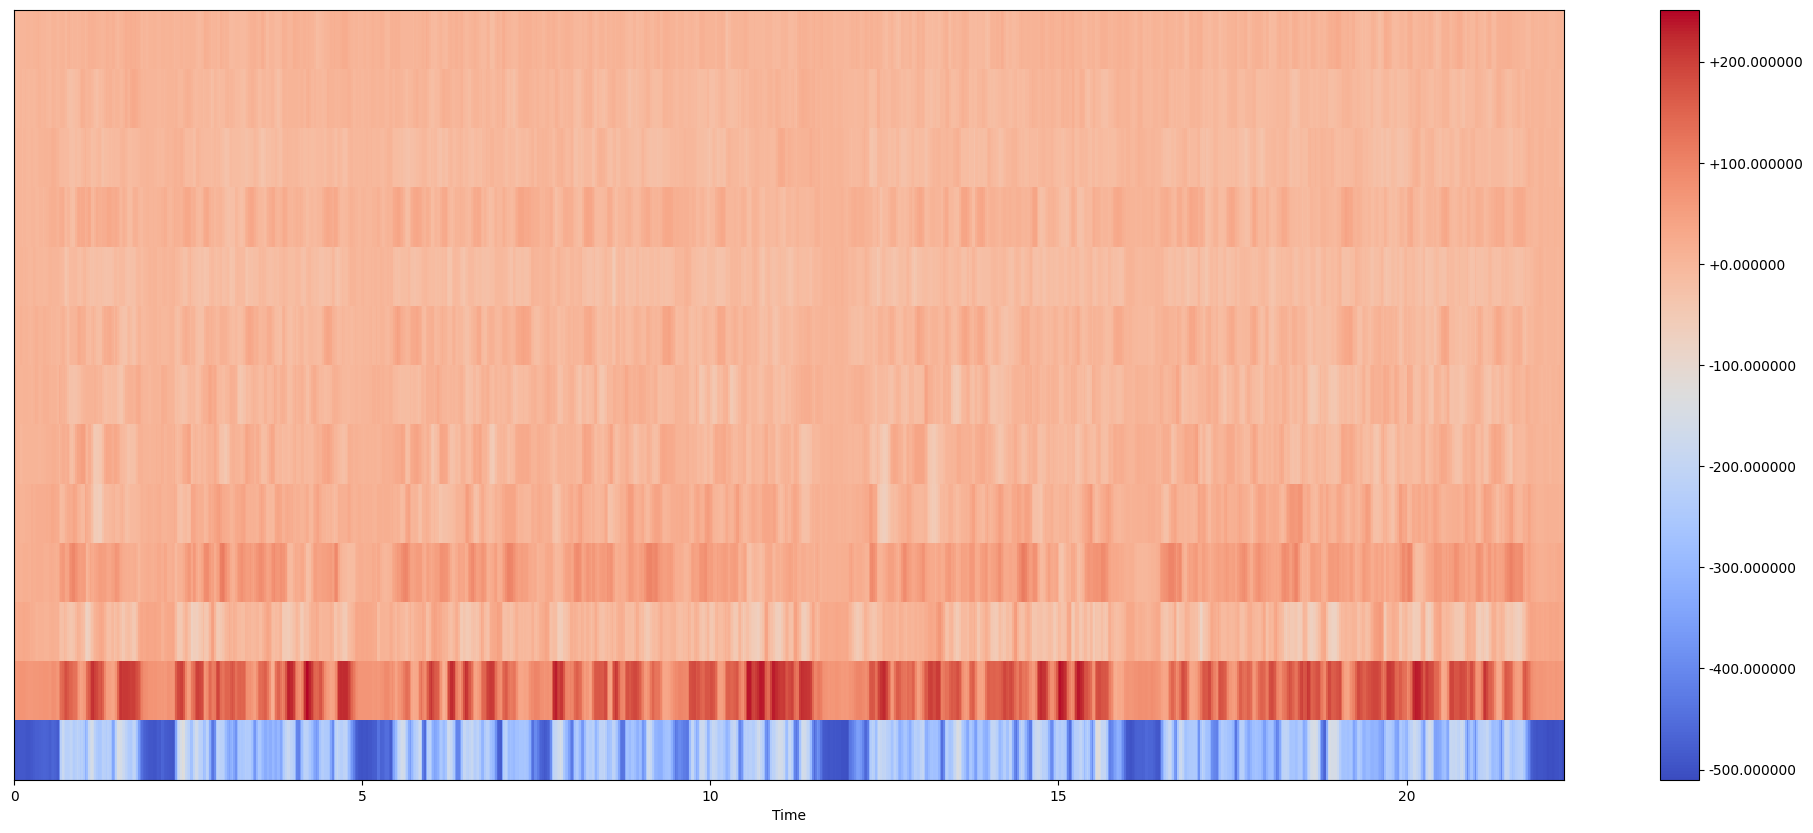

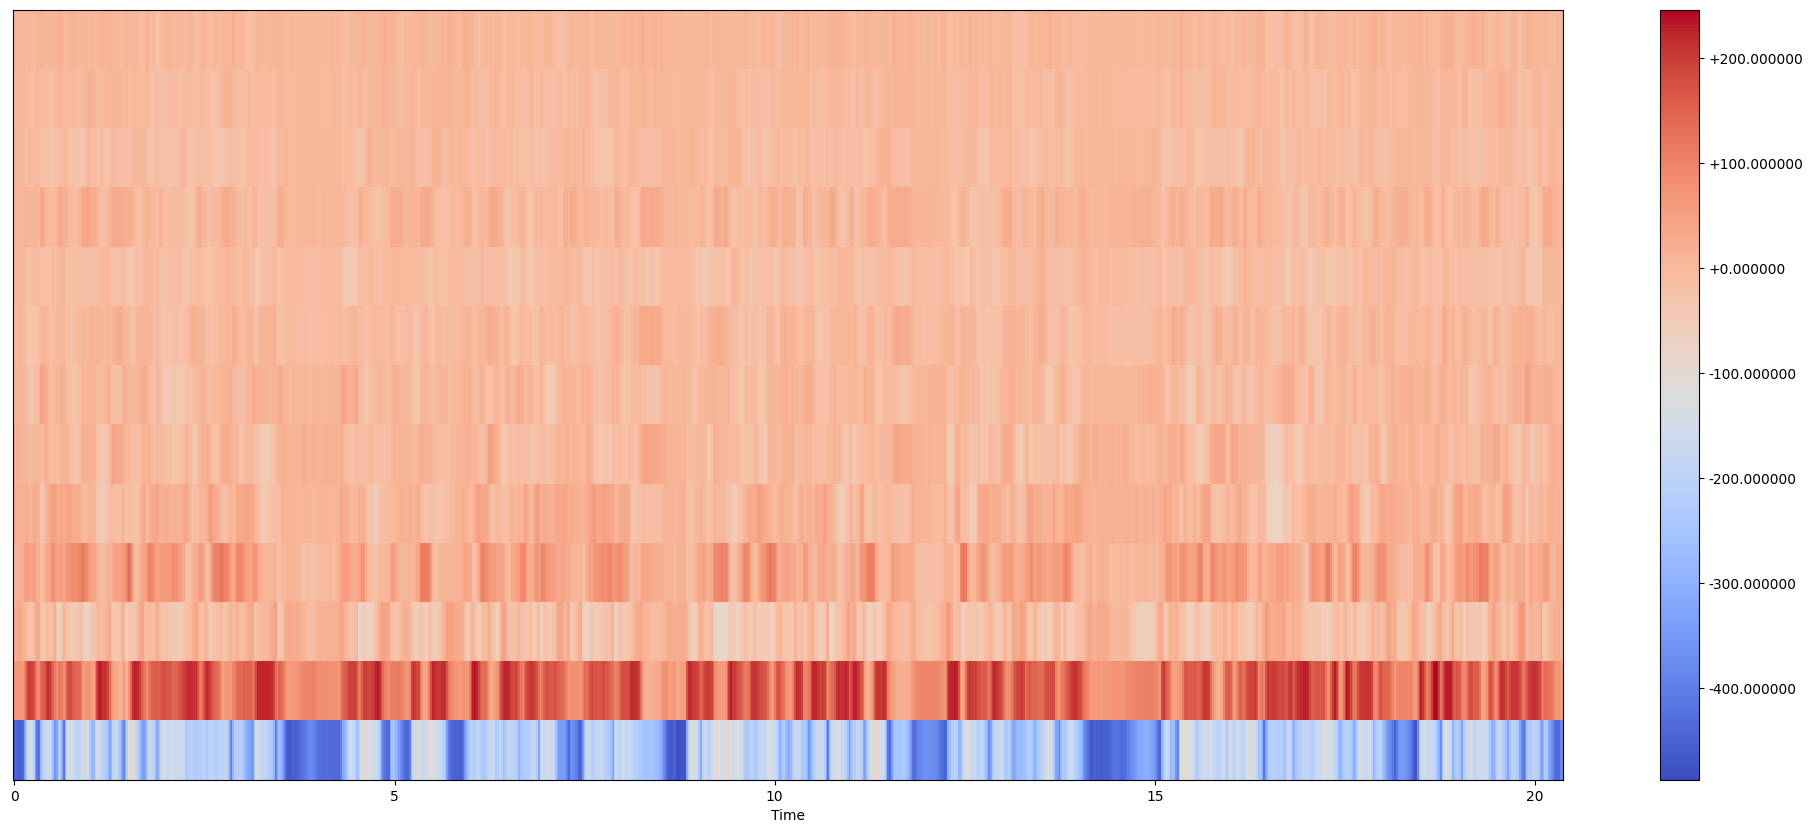

In [27]:
visualize(human, human_sr)
visualize(synthetic, synthetic_sr)
# Each point in the diagram is a value for a given mfcc

## 5. Data Concatenation

In [29]:
# Concatenating mfcc. What does this do?
# This will be the subject. 
h_comprehensive_mfcc = np.concatenate((human, h_delta, h_delta2))
# print(h_comprehensive_mfcc)
h_comprehensive_mfcc.shape #output: rows, columns

(39, 959)

In [26]:
np.savetxt("concatenated.csv", h_comprehensive_mfcc, delimiter=",")

In [30]:
# Concatenating mfcc.
s_comprehensive_mfcc = np.concatenate((synthetic, s_delta, s_delta2))
s_comprehensive_mfcc.shape #output: rows, columns

# MFCCs capture the static characteristics of the audio signal.
# Delta features capture the dynamic characteristics.
# Delta-delta features capture the acceleration, providing even more temporal detail.
# By combining these features, you get a comprehensive representation that includes both static and dynamic information about the speech signal.

(39, 878)

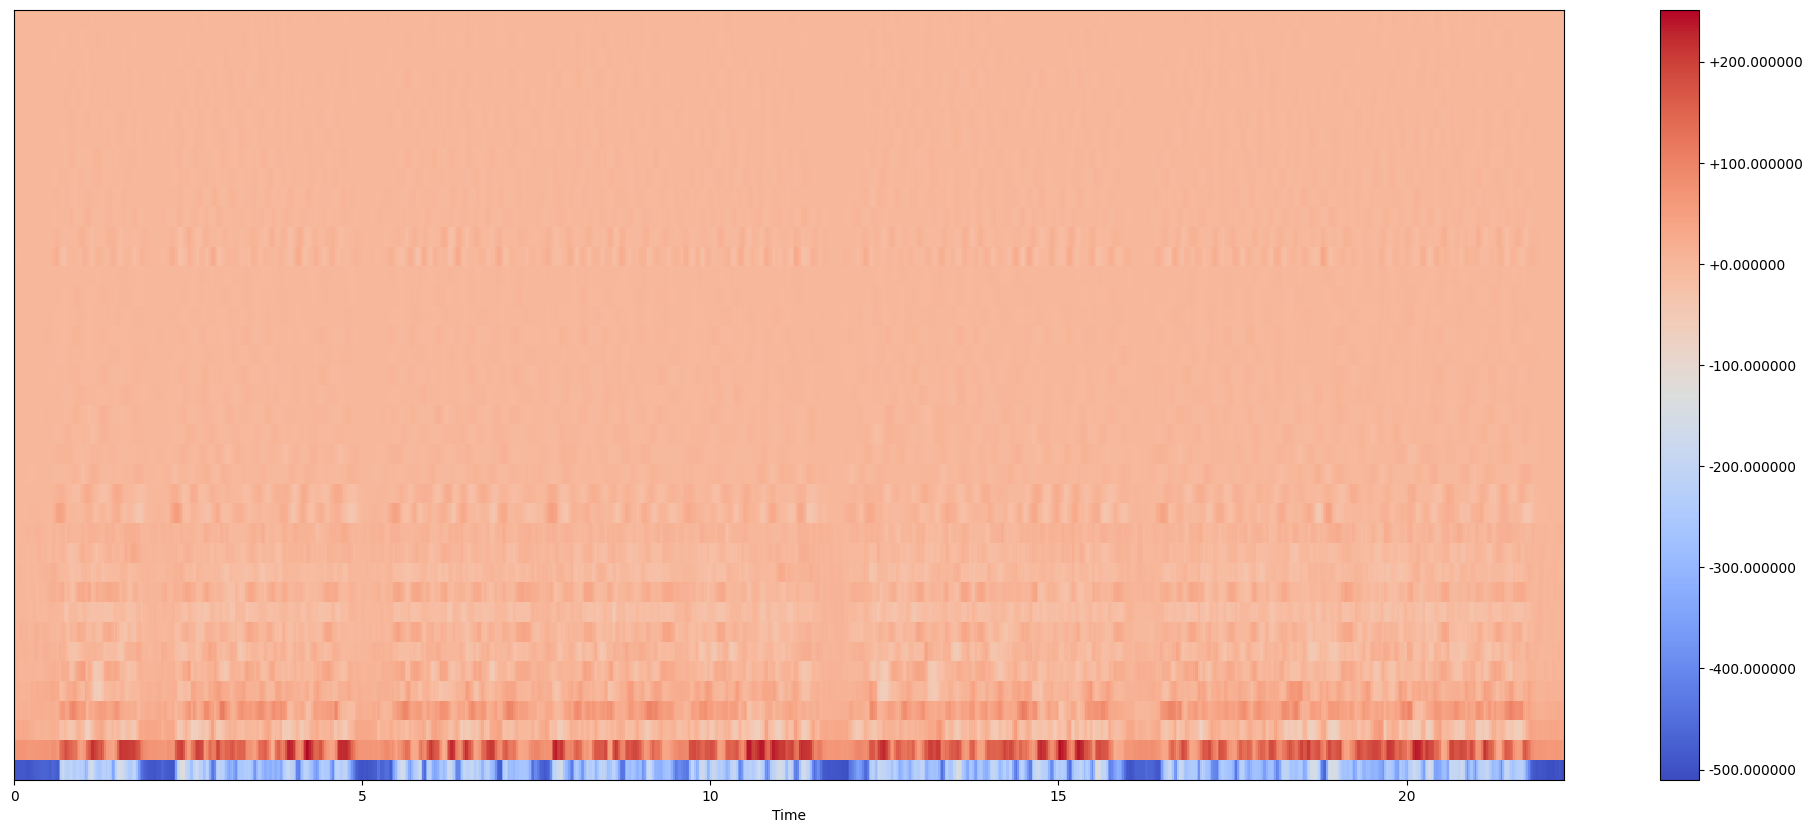

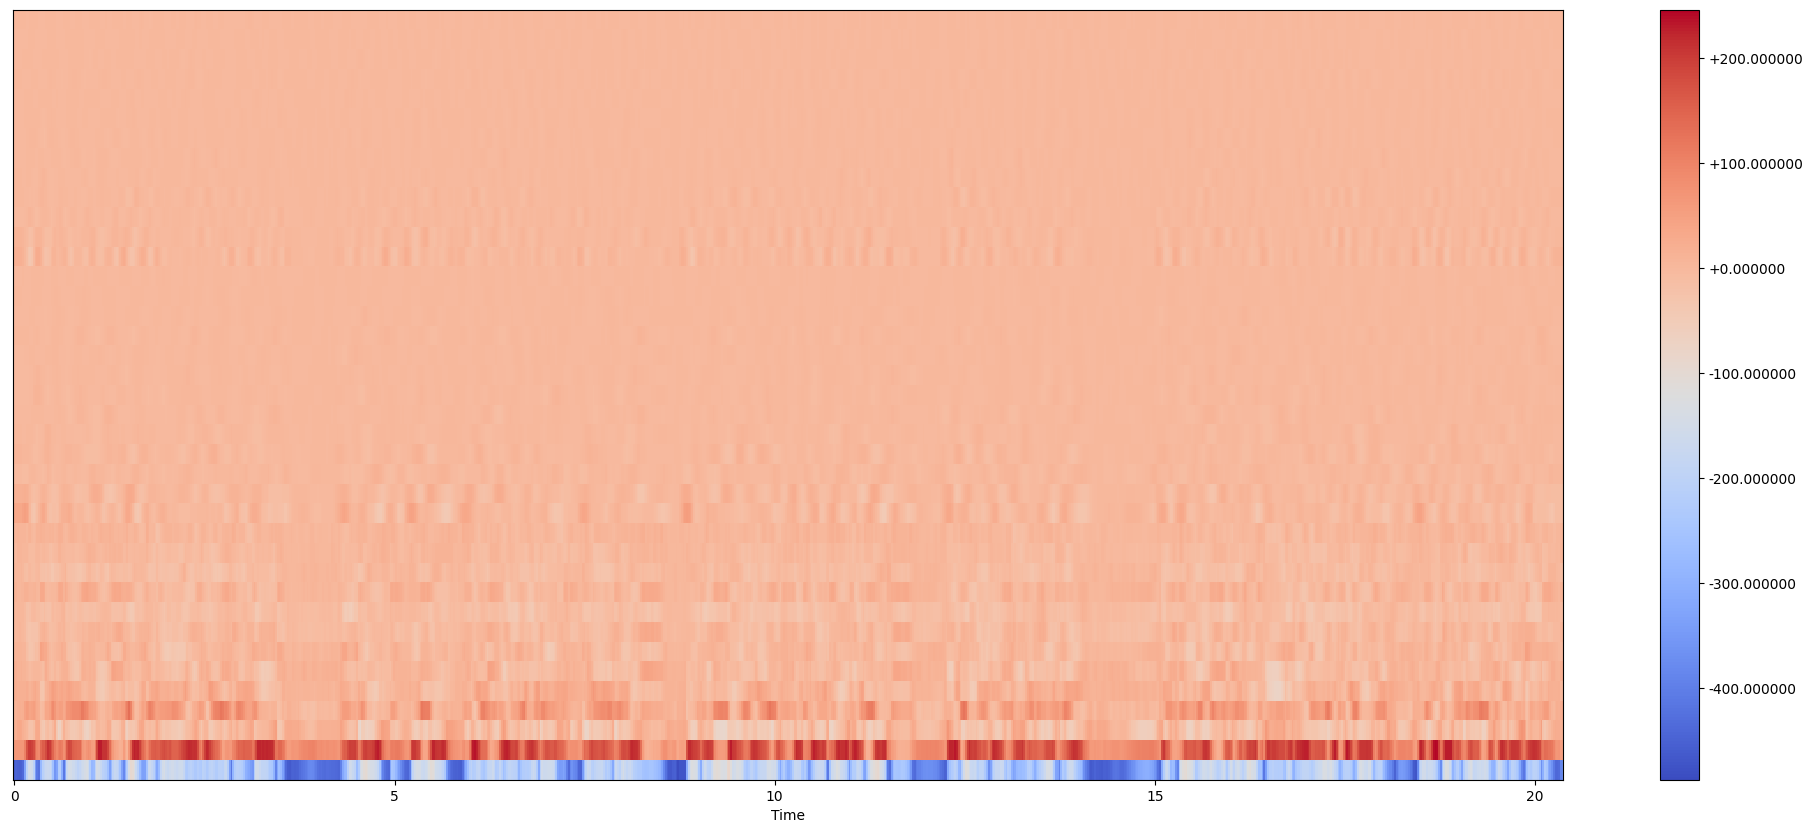

In [31]:
visualize(h_comprehensive_mfcc, human_sr)
visualize(s_comprehensive_mfcc, synthetic_sr)

## 6. Reduce the size

In [32]:
# Compute the Mean of the Concatenated Features
def compute_mean_features(comprehensive_mfcc):
    mean_features = np.mean(comprehensive_mfcc.T, axis=0)
    return mean_features

In [33]:
h_mean_features = compute_mean_features(h_comprehensive_mfcc)
s_mean_features = compute_mean_features(s_comprehensive_mfcc)

In [34]:
h_mean_features.shape

(39,)

In [32]:
np.savetxt("mean.csv", h_mean_features, delimiter=",")
# 1 column & multiple rows convert to single row

## 7. Save to CSV 

In [35]:
# Create a annotated dataset
def create_csv(all_features, headers, csv_filename):
    df = pd.DataFrame(all_features, columns=headers)
    df.to_csv(("result/" + csv_filename), index=False)
    print(f'MFCC features saved to {csv_filename}')

In [35]:
# create_csv(h_mean_features, "human_mfcc")
# create_csv(s_mean_features, "synthetic_mfcc")

## 8. Summarize

In [37]:
# Function to process all files in a given folder and accumulate features
def process_audio_files(folder_path, label):
    all_features = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.mp3') or file.endswith('.wav'):  # Add other audio file extensions if needed
                audio_file = os.path.join(root, file)
                signal, sr = pre_process(audio_file)
                mfcc = extract_MFCC(signal, sr)
                delta, delta2 = get_delta(mfcc)
                comprehensive_mfcc = np.concatenate((mfcc, delta, delta2))
                mfccs_scaled_features = np.mean(comprehensive_mfcc.T, axis=0)
                feature_row = [file] + mfccs_scaled_features.tolist()
                all_features.append(feature_row)
    
    # Create CSV with all features
    num_features = len(all_features[0]) - 1
    headers = ['file_name'] + [f'mfcc_feature{i+1}' for i in range(num_features)]
    create_csv(all_features, headers, f"{label}.csv")

In [66]:
human_audio_folder = "TrainingData/human"
synthetic_audio_folder = "TrainingData/synthetic"
process_audio_files(human_audio_folder, "human_mfcc_features")
process_audio_files(synthetic_audio_folder, "synthetic_mfcc_features")

Signal:  [ 2.52657446e-06  4.32676779e-06 -1.41351165e-05 ... -3.47104833e-06
  1.66832906e-05 -1.31107645e-05]
Sample Rate:  22050
(13, 1077)
[[-521.867 -521.867 -521.867 ... -521.867 -521.867 -521.867]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 ...
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]]
Signal:  [-1.427332e-05 -5.365288e-06 -4.050452e-06 ...  9.134550e-06 -8.774914e-06
 -8.206062e-09]
Sample Rate:  22050
(13, 1110)
[[-630.39777 -630.39777 -630.39777 ... -630.39777 -630.39777 -630.39777]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 ...
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.  

# Extract single audio file

In [68]:
process_audio_files("TrainingData/test/synthetic_test", "synthetic_test1")
# process_audio_files("TrainingData/test/synthetic_test", "synthetic_test")

Signal:  [ 3.1533104e-04  6.7237380e-04  6.6792249e-04 ...  7.3594034e-05
 -1.1297482e-03  0.0000000e+00]
Sample Rate:  22050
(13, 708)
[[-4.8661633e+02 -4.6002206e+02 -4.6346408e+02 ... -4.2486301e+02
  -4.2654697e+02 -4.5058704e+02]
 [ 3.0860947e+01  4.5247597e+01  4.2577816e+01 ...  6.6036957e+01
   6.7890419e+01  6.2643265e+01]
 [ 7.7993574e+00  1.1838937e+00 -1.6114248e+00 ...  1.6932818e+00
   7.1085148e+00  1.5474158e+01]
 ...
 [ 3.4183760e+00  2.9312291e+00  2.2261958e+00 ... -6.7022891e+00
  -6.6718225e+00 -2.5542579e+00]
 [-3.2769804e+00 -9.1683447e-01 -7.9897559e-01 ... -1.2694989e+00
  -1.6858706e+00 -3.7799840e+00]
 [-5.0791163e+00 -2.6313496e+00 -4.7817034e-01 ... -6.9293272e-01
  -6.8896353e-02 -2.0006897e+00]]
MFCC features saved to synthetic_test1.csv
